In [2]:
import sqlite3
from src.models.MatchingType import MatchingType

In [3]:
con = sqlite3.connect('../data/interim/articles_with_author_mapping.db')
cur = con.cursor()

In [4]:
# find out percentage of abbreviations/full_names of written articles

n_full_names = cur.execute('select count(ar.id) from articles ar join article_authors aa on ar.id = aa.article_id join unmapped_authors ua on aa.author_id = ua.id where ar.organization = "lvz" and ua.matching_type = ?', (MatchingType.IS_FULL_NAME.name, )).fetchone()[0]

n_abbreviations = cur.execute('select count(ar.id) from articles ar join article_authors aa on ar.id = aa.article_id join unmapped_authors ua on aa.author_id = ua.id where ar.organization = "lvz" and ua.matching_type != ? and ua.matching_type != ?', (MatchingType.IS_FULL_NAME.name, MatchingType.ORGANIZATION_MATCH.name)).fetchone()[0]

print(f'Percentage of full names: {n_full_names / (n_full_names + n_abbreviations)}')
print(f'Percentage of abbreviations: {n_abbreviations / (n_full_names + n_abbreviations)}')

Percentage of full names: 0.7888187534632712
Percentage of abbreviations: 0.21118124653672873


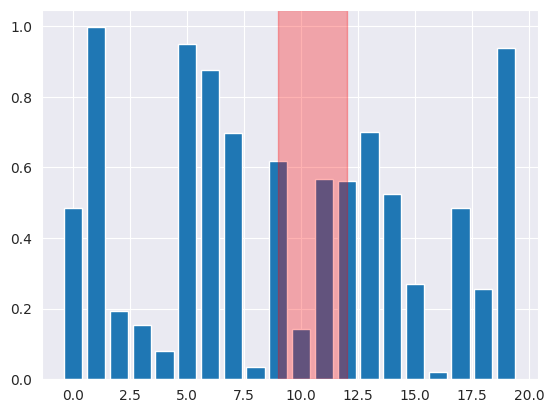

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.animation import FuncAnimation

# Generate some random data for demonstration
data = np.random.rand(10, 20)

# Set up the initial bar plot
fig, ax = plt.subplots()
bars = ax.bar(range(len(data[0])), data[0])

# Set up the rectangle parameters
rect_width = 3.0  # Width of the moving rectangle
rect_height = ax.get_ylim()[1]  # Height of the moving rectangle (same as the plot)

# Create the initial rectangle
rect = Rectangle((0, 0), rect_width, rect_height, alpha=0.3, color='red')
ax.add_patch(rect)

# Function to update the plot for each animation frame
def update(frame):
    # Update the position of the rectangle
    rect.set_x(frame)

    return (rect,)  # Return a tuple containing only the rectangle

# Set the number of frames (equal to the number of rows in your data)
num_frames = len(data)

# Create the animation
animation = FuncAnimation(fig, update, frames=num_frames, interval=200, blit=True)

# Save the animation as a GIF
animation.save('animated_rectangle.gif', writer='imagemagick')

plt.show()
